# Logistic Regression

Logistic regression is a predictive modelling algorithm that is used when the Y variable is binary categorical. That is, it can take only two values like 1 or 0. The goal is to determine a mathematical equation that can be used to predict the probability of event 1.

Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

 #### Hypothesis (h)
Hypothesis is a significant relationship between an independent variable X and a dependent variable Y.

${x_0}$ is bias value should be 1
 
 $\begin{align}
    \ {h} = \theta_0*x_0+ \theta_1*x_1+ \theta_2*x_2 +\theta_3*x_3... \;\;
    \end{align}
   $

#### Sigmoid Function
The main idea is to take the outputs from the linear equation ($h=x \theta$) and use the sigmoid function 
($\frac{1}{1+e^{-h}}$) to restrict the value between (0, 1).

$\begin{align}
   \ {s} = \frac{1}{1+e^{-h}}    
   \end{align}
    $
<ol>
    <li>h is zero then sigmoid value 0.5</li>
    <li>h is $\infty$ then sigmoid value 1</li>
    <li>h is $-{\infty} $ then sigmoid value 0</li>
    <li>The sigmoid function gives an ‘S’ shaped curve.</li>
    
</ol>

##### Note:  
 "" Thus, if the output is more than 0.5 , we can classify the outcome as 1 (or YES) and if it is less than 0.5 , we can classify it as 0(or NO). ""

#### Cost Functions (mean squared difference)
    
 $\begin{align}
   \ {J(min)} = -(y)*({\log} h)-{(1-y)}*{\log (1-h)} 
   \end{align}
  $

#### Gradient Descent
Gradient Descent is a general function for minimizing a function, in this case the Mean Squared Error(MSE) or cost function.

$\begin{align}
   \ {\theta} = {\theta}-{ \alpha }\frac{\partial j}{\Bigl({\partial \theta}\Bigr)}
   \end{align}
    $

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random

In [2]:
# Read The Dataset
data=pd.read_csv('C:/Users/Ajaykumar/Data_set/wdbc.data',sep=',',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Rename columns
data.rename(columns={0:'id',1:'diagnosis',2:'radius_mean',3:'texture_mean',4:'perimeter_mean',5:'area_mean',6:'smoothness_mean',7:'compactness_mean',8:'concavity_mean',9:'concave points_mean',10:'concave_points_mean',11:'symmetry_mean',12:'fractal_dimension_mean',13:'radius_se',14:'texture_se',15:'perimeter_se',16:'area_se',17:'smoothness_se',18:'compactness_se',19:'concavity_se',20:'concave points_se',21:'symmetry_se',22:'fractal_dimension_se',23:'radius_worst',24:'texture_worst',25:'perimeter_worst',26:'area_worst',27:'smoothness_worst',28:'compactness_worst',29:'concavity_worst',30:'concave points_worst',31:'symmetry_worst',32:'fractal_dimension_worst'},inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Dataset columns
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')

In [5]:
#Giving short summaries about the sample & measures of the data
data.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [6]:
print(np.shape(data))

(569, 32)


In [7]:
#Dropna() method allows the user to analyze and drop Rows/Columns with Null values in different ways.
data.dropna(subset=['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst'],inplace=True)

In [8]:
print(np.shape(data))

(569, 32)


In [9]:
#Index.value_counts() function returns object containing counts of unique values.
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
#Replace function is used to replace values given in to_replace with value. The values of the Series are replaced with other values dynamically.
data.replace({'B':0,'M':1},inplace=True)

In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
#iloc used when the index label of a data frame is something other than numeric series.
x=np.array(data.iloc[:,2:32])
y=np.array(data[['diagnosis']])

In [13]:
# shape of x & y 
print(np.shape(x))
print(np.shape(y))

(569, 30)
(569, 1)


### Train & Test Dataset

The training data is used to make sure the machine recognizes patterns in the data,and the test data is used to see how well the machine can predict new answers based on its training.

In [14]:
#split function using randomization
def split_data(x,y,test_per):
    m=len(x)
    random_data=np.random.randint(0,m,m)
    #Number Of train set & test set 
    num_train_set = int((1-test_per)*m)
    num_test_set  = int(test_per*m)
    train_ind=random_data[0:num_train_set]
    #creating a array of zeros for the train dataset
    x_train=np.zeros((len(train_ind),1))
    y_train=np.zeros((len(train_ind),1))
    # x_train & y_train after the split 
    x_train = x[train_ind]
    y_train = y[train_ind]
    
    num_test_set=random_data[num_train_set::]
    #creating a array of zeros for the test dataset
    x_test=np.zeros((len(num_test_set),1))
    y_test=np.zeros((len(num_test_set),1))
    #x_test & y_test after the split
    x_test = x[num_test_set]
    y_test = y[num_test_set]
    return x_train,y_train,x_test,y_test

In [15]:
x_train,y_train,x_test,y_test = split_data(x,y,0.2)

In [16]:
print("Train data:",np.shape(x_train),np.shape(y_train))
print("Test Data:",np.shape(x_test),np.shape(y_test))

Train data: (455, 30) (455, 1)
Test Data: (114, 30) (114, 1)


## Feature Scaling 
Scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

$->\begin{align}
   \frac{(x_i -\mu)}{\sigma}
   \end{align}
 $
    
    

#### Normalization X_train

In [17]:
# r :- Number of X_train Examples
# c :- Number of features
r,c= np.shape(x_train)
scale_x=np.zeros((r,c))
mu=np.zeros((c,1))
sigma=np.zeros((c,1))
for j in range(c):
    mu[j]=np.mean(x_train[:,j])
    sigma[j]=np.std(x_train[:,j])
    scale_x[:,j]=(x_train[:,j]-mu[j])/sigma[j]
print(np.shape(scale_x))


(455, 30)


#### Normalization X_test

In [18]:
m,n=np.shape(x_test)
scale_x_test=np.zeros((m,n))
for j in range(n):
    scale_x_test[:,j]=(x_test[:,j]-mu[j])/sigma[j]
print(np.shape(scale_x_test))

(114, 30)


## Adding x0 bias in X_train & X_test Dataset

In [19]:
print(np.shape(scale_x))
r,c=np.shape(scale_x)
x0=np.ones((1,r))
x_train=np.transpose(np.concatenate((x0,np.transpose(scale_x))))
print(np.shape(x_train))

(455, 30)
(455, 31)


In [20]:
print(np.shape(scale_x_test))
r,c=np.shape(scale_x_test)
x0=np.ones((1,r))
x_test=np.transpose(np.concatenate((x0,np.transpose(scale_x_test))))
print(np.shape(x_test))

(114, 30)
(114, 31)


## Cost Function and Gradient Descent
<ul>
    <li>Dimension of x_train (455,31)</li>
    <li>Dimension of y_train (455,1)</li>
    <li>Dimension of theta (31,1)</li>
    <li>Dimension of error (31,1)</li>
    <li>Dimension of h (455,1)</li>
 </ul>

In [32]:
#Initialize variables
r,c= np.shape(x_train)
theta=np.zeros((c,1))
alpha=0.01
num_iter=800

In [33]:
#sigmoid function between 0 & 1
def sigmoid(n):
    s=np.zeros((len(n),1))
    for i in range(len(n)):
        if n[i]<0:
            s[i]=1-1/(1+math.exp(n[i]))
        else:
            s[i]=1/(1+math.exp(-n[i]))
    return s

In [34]:
#Error between the hypothesis and actual y value.
def costfunction(x_train,y_train,theta):
    cost=0
    for i in range(0,r):
        h=np.matmul(x_train,theta)
        z=sigmoid(h)
        if z[i]!=0 and z[i]!=1.0:
            j1=((1/r)*(-y_train[i]*math.log(z[i]))-((1-y_train[i])*math.log(1-z[i])))
            cost+=j1
    return cost
    

In [35]:
j1 = costfunction(x_train,y_train,theta)
print("Cost value is", j1)

Cost value is [181.2069538]


In [36]:
#Gradient descent is used to calculate, the right values of theta by reducing the cost function.
def gradientDescent(x_train,y_train,theta,alpha,num_iters):
    J_history=[]
    l=0
    while l<num_iters:
        err=np.zeros((c,1))
        h=np.matmul(x_train,theta)
        z=sigmoid(h)
        err=np.sum(((z-y_train)*(x_train)),axis=0)
        err=np.transpose([err])
        cost=costfunction(x_train,y_train,theta)
        J_history.append(cost)
        theta=theta-alpha*(1/r)*err
        l=l+1
    return theta,J_history

In [37]:
thetas,J_history=gradientDescent(x_train,y_train,theta,alpha,num_iter)
#print('Theta values:',thetas)

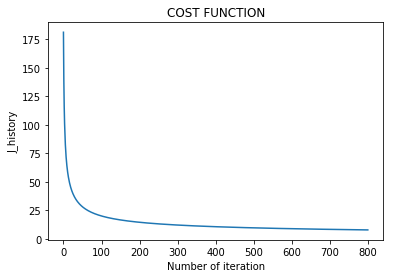

In [27]:
# Cost Function graph
plt.plot(J_history)
plt.title("COST FUNCTION")
plt.xlabel('Number of iteration')
plt.ylabel('J_history')
plt.show()

### Predicting $\hat Y$
$
\hat Y = Number\;of\;Xtrain\;Examples * Updated\; \theta
$

In [28]:
h1=np.matmul(x_train,thetas)
y_hat=sigmoid(h1)
m=len(y_hat)
yhat=np.zeros(np.size((y_hat)))
for i in range(m):
    if y_hat[i]>0.5:
        yhat[i]=1
print(yhat)

[1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.

## Training Minimum Error(TME) & Accuracy

$
TME = np.sum(np.abs(ytrain\;/\;max(ytrain)-\hat y\;/\;max \hat y)\;/\;len(\hat y))
$

$
Accuracy = (1-TME)*100
$

In [29]:
#Predicting y using the values of thetas obtained from gradient descent.
yhat=np.transpose([yhat])
train_err=np.sum(abs(y_train/max(y_train)-yhat/max(yhat))/(len(y_train)))
print('Train Error',train_err)
accuracy=(1-train_err)*100
print('Accuracy:',accuracy)

Train Error 0.004395604395604396
Accuracy: 99.56043956043956


In [30]:
h2=np.matmul(x_test,thetas)
y_hat_test=sigmoid(h2)
m=len(y_hat_test)
yhat=np.zeros(np.size((y_hat_test)))
for i in range(m):
    if y_hat_test[i]>0.5:
        yhat[i]=1
print(yhat)

[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.]


In [31]:
#Predicting y using the values of thetas obtained from gradient descent.
yhat=np.transpose([yhat])
test_err=np.sum(abs(y_test/max(y_test)-yhat/max(yhat))/(len(y_test)))
print('Train Error',test_err)
accuracy=(1-test_err)*100
print('Accuracy:',accuracy)

Train Error 0.043859649122807015
Accuracy: 95.6140350877193
